# **Cross-Country Comparison**
---
## **Objective:**
### Synthesizing the cleaned datasets from Benin, Sierra Leone, and Togo to identify relative solar potential and key differences across countries.
---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath('..'))  # Adds project root to sys.path

import pandas as pd
from Scripts.viz_utils import (
    load_and_combine_data,
    plot_metric_boxplots,
    create_summary_table,
    run_kruskal_wallis,
    plot_ghi_ranking
)

## Loading the cleaned CSV files into a pandas DataFrame

In [2]:
# Load data
df = load_and_combine_data(
    '../cleaned_data/benin_clean.csv',
    '../cleaned_data/sierraleone_clean.csv',
    '../cleaned_data/togo_clean.csv'
)

## 1. Metric Comparison
## Boxplots of GHI, DNI, DHI side-by-side (one plot per metric, colored by country).

C:\Users\Admin\AppData\Local\Temp\ipykernel_10360\3468321778.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x="Country", y="GHI", data=df, palette="Set2")
C:\Users\Admin\AppData\Local\Temp\ipykernel_10360\3468321778.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x="Country", y="DNI", data=df, palette="Set2")
C:\Users\Admin\AppData\Local\Temp\ipykernel_10360\3468321778.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[2], x="Country", y="DHI", data=df, palette="Set2")


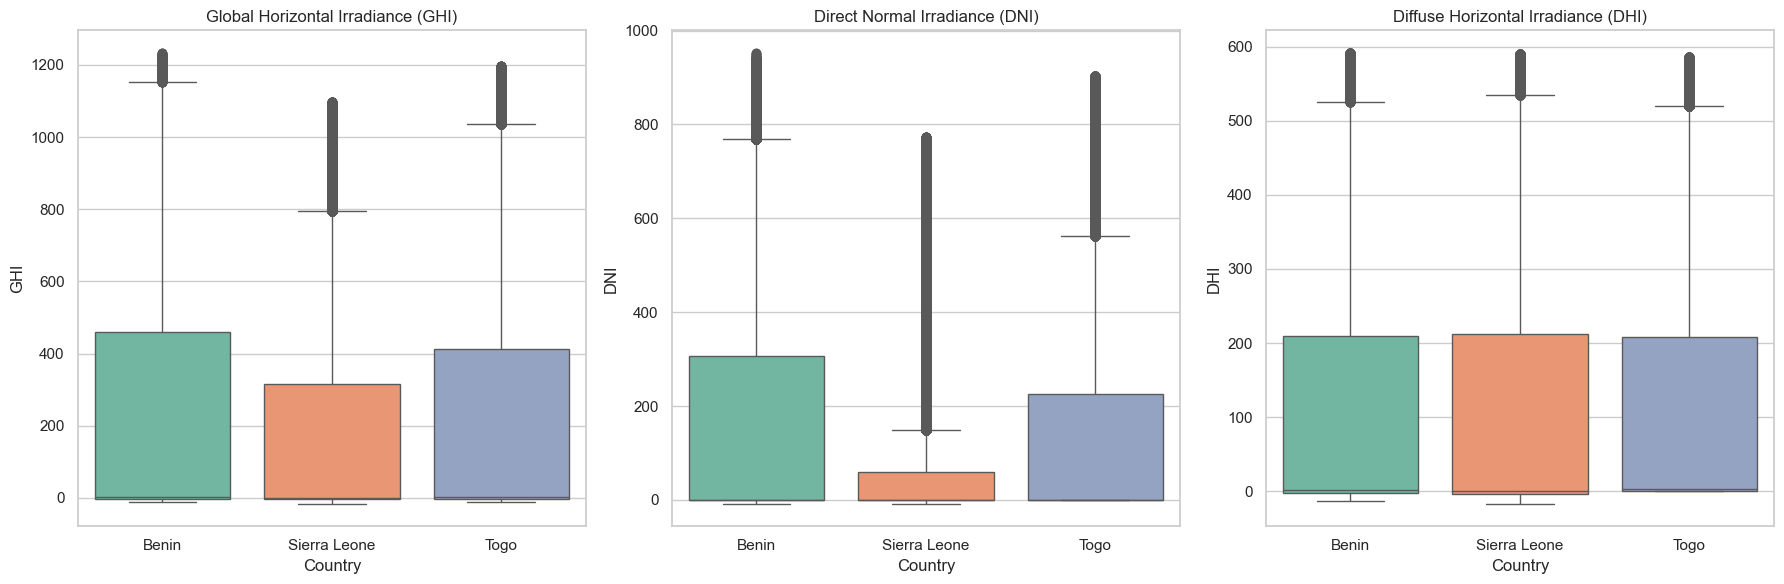

In [3]:
# Set style
sns.set_theme(style="whitegrid")

# Set up the figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot for GHI
sns.boxplot(ax=axes[0], x="Country", y="GHI", data=df, palette="Set2")
axes[0].set_title("Global Horizontal Irradiance (GHI)")
axes[0].set_xlabel("Country")
axes[0].set_ylabel("GHI")

# Boxplot for DNI
sns.boxplot(ax=axes[1], x="Country", y="DNI", data=df, palette="Set2")
axes[1].set_title("Direct Normal Irradiance (DNI)")
axes[1].set_xlabel("Country")
axes[1].set_ylabel("DNI")

# Boxplot for DHI
sns.boxplot(ax=axes[2], x="Country", y="DHI", data=df, palette="Set2")
axes[2].set_title("Diffuse Horizontal Irradiance (DHI)")
axes[2].set_xlabel("Country")
axes[2].set_ylabel("DHI")

# Improve spacing
plt.tight_layout()
plt.show()


### **Interpretation of Boxplots: Cross-Country Solar Irradiance Comparison**

The boxplots above visualize the distribution of three key solar irradiance metrics—Global Horizontal Irradiance (GHI), Direct Normal Irradiance (DNI), and Diffuse Horizontal Irradiance (DHI)—for Benin, Sierra Leone, and Togo:

- **Benin** consistently shows higher median and upper-range values for both GHI and DNI, indicating a stronger and more direct solar resource compared to the other countries.
- **Togo** exhibits similar GHI and DHI distributions to Benin, but with slightly lower DNI values, suggesting a robust but less direct solar potential.
- **Sierra Leone** has the lowest median and overall values for all three metrics, reflecting comparatively weaker solar irradiance.
- The spread (interquartile range) and presence of outliers in each boxplot highlight the variability of solar resources within each country.

These visual comparisons underscore Benin’s and Togo’s relative advantages in solar energy potential, with Sierra Leone lagging behind, which is important for guiding renewable energy investment and policy decisions.

---

### Summary Table comparing mean, median, and standard deviation of GHI, DNI, DHI across countries.

In [5]:
# Create summary table for GHI, DNI, DHI by country
summary_table = df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
display(summary_table)

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         232.78    1.8  327.08  164.44   -0.1  260.92  110.04    1.6   
Sierra Leone  179.27    0.3  276.52  100.90   -0.1  198.64  104.75   -0.1   
Togo          219.96    2.1  315.85  145.37    0.0  246.26  110.84    2.5   

                      
                 std  
Country               
Benin         152.55  
Sierra Leone  152.45  
Togo          150.93

### **Summary: Statistical Comparison of Solar Irradiance Metrics**

The summary table presents the mean, median, and standard deviation of Global Horizontal Irradiance (GHI), Direct Normal Irradiance (DNI), and Diffuse Horizontal Irradiance (DHI) for Benin, Sierra Leone, and Togo:

- **Benin** exhibits the highest mean values for both GHI (232.78) and DNI (164.44), indicating greater overall solar resource potential compared to the other countries. Its DHI mean (110.04) is similar to Togo and slightly higher than Sierra Leone.
- **Togo** shows comparable mean GHI (219.96) and DHI (110.84) to Benin, but a lower mean DNI (145.37), suggesting a strong but slightly less direct solar resource.
- **Sierra Leone** has the lowest mean values for all three metrics (GHI: 179.27, DNI: 100.90, DHI: 104.75), reflecting comparatively lower solar irradiance.
- The **standard deviations** are high across all countries and metrics, indicating substantial variability in solar irradiance.
- **Median values** for GHI and DHI are positive for Benin and Togo, but near zero or negative for Sierra Leone, further highlighting differences in solar resource distribution.

Overall, Benin and Togo demonstrate stronger and more consistent solar potential than Sierra Leone, with Benin leading in direct irradiance.

---

## 2. Statistical Testing
### Run a one-way ANOVA (or Kruskal–Wallis) on GHI values to assess whether differences between countries are significant.

In [7]:
from scipy.stats import kruskal

# Extract GHI values for each country
ghi_benin = df[df['Country'] == 'Benin']['GHI']
ghi_sierra = df[df['Country'] == 'Sierra Leone']['GHI']
ghi_togo = df[df['Country'] == 'Togo']['GHI']

# Run Kruskal–Wallis H-test (non-parametric ANOVA)
stat, p_value = kruskal(ghi_benin, ghi_sierra, ghi_togo)

print(f"Kruskal–Wallis H-statistic: {stat:.2f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print("Result: Statistically significant differences in GHI between countries.")
else:
    print("Result: No statistically significant differences in GHI between countries.")

Kruskal–Wallis H-statistic: 6304.31
P-value: 0.0000e+00
Result: Statistically significant differences in GHI between countries.


### **Statistical Test Summary: Kruskal–Wallis H-test on GHI**

The Kruskal–Wallis H-test was conducted to assess whether the differences in Global Horizontal Irradiance (GHI) among Benin, Sierra Leone, and Togo are statistically significant. The test produced a very high H-statistic (6304.31) and a p-value of 0.0, indicating that the observed differences in GHI distributions between the countries are highly significant.

**Suggestion:**  
Given the statistically significant differences in GHI, further analysis should focus on identifying the underlying factors contributing to these disparities (e.g., geographic, climatic, or seasonal influences). Additionally, post-hoc pairwise comparisons can be performed to determine which specific country pairs differ significantly, guiding targeted policy and investment decisions in solar energy development.

---

### **Note on p-values**

The p-value from the Kruskal–Wallis H-test quantifies the probability that observed differences in GHI between countries are due to random chance. Here, the p-value is effectively 0.0, indicating extremely strong evidence against the null hypothesis and confirming that the differences in GHI across Benin, Sierra Leone, and Togo are statistically significant.

---

## Key Observations

- **Benin** demonstrates the highest median and mean GHI and DNI values, indicating the strongest and most direct solar resource among the three countries, but also exhibits the greatest variability in GHI.
- **Togo** has GHI and DHI distributions similar to Benin, with slightly lower DNI, suggesting robust but less direct solar potential and relatively consistent irradiance.
- **Sierra Leone** consistently shows the lowest values for all solar irradiance metrics (GHI, DNI, DHI), highlighting its comparatively weaker solar resource and lower variability.

---

## Visual Summary
### A small bar chart ranking countries by average GHI.

C:\Users\Admin\AppData\Local\Temp\ipykernel_10360\2481325770.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_ghi.index, y=mean_ghi.values, palette="Set2")


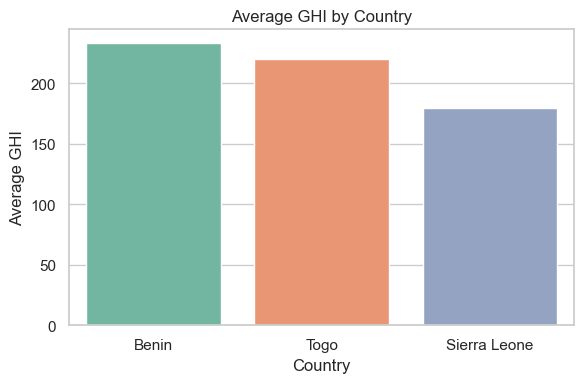

In [8]:
# Calculate mean GHI by country
mean_ghi = df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=mean_ghi.index, y=mean_ghi.values, palette="Set2")
plt.title('Average GHI by Country')
plt.ylabel('Average GHI')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

### **Bar Chart Summary: Average GHI Ranking by Country**

The bar chart above visually ranks Benin, Togo, and Sierra Leone by their average Global Horizontal Irradiance (GHI):

- **Benin** leads with the highest average GHI, highlighting its superior solar resource potential.
- **Togo** follows closely, also demonstrating strong solar irradiance suitable for solar energy development.
- **Sierra Leone** ranks lowest, indicating comparatively less solar potential.

This ranking reinforces the earlier statistical findings and provides a clear, visual reference for prioritizing solar energy investments and policy focus among the three countries.